Loading file:  Lorentz_Part_000020.csv


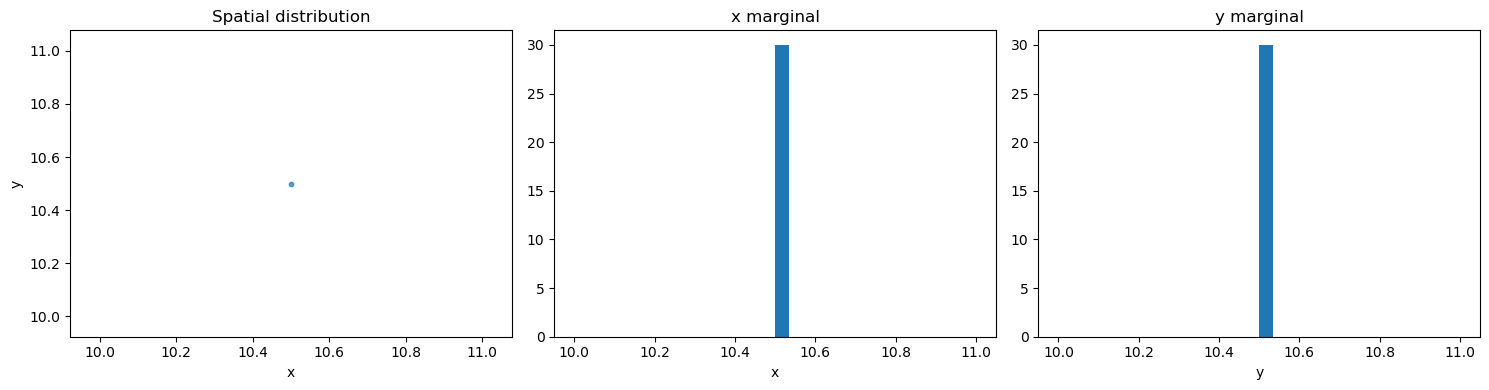

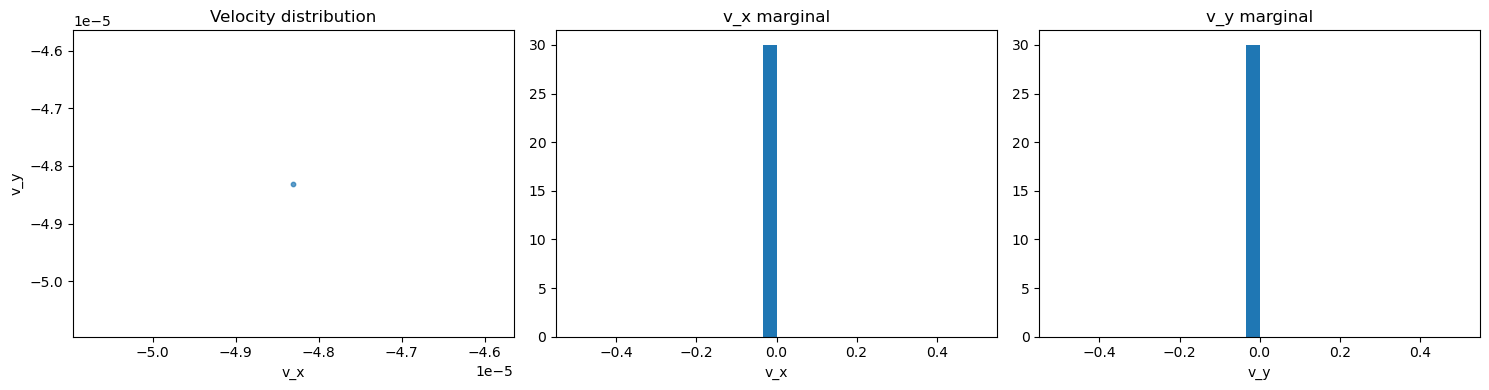

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# ----------------------------
# Load CSV
# ----------------------------
# change filename as needed
# find all Lorentz_Part_*.csv files in the current directory
# select the last one
file_match = glob.glob("Lorentz_Part_*.csv")
file_match.sort()
filename = file_match[0]
print("Loading file: ", filename)
df = pd.read_csv(filename)

x  = df["X"].to_numpy()
y  = df["Y"].to_numpy()
vx = df["Field_2_0"].to_numpy()
vy = df["Field_2_1"].to_numpy()

# ----------------------------
# Spatial distribution
# ----------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(x, y, s=10, alpha=0.7)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("Spatial distribution")

axs[1].hist(x, bins=30, density=True)
axs[1].set_xlabel("x")
axs[1].set_title("x marginal")

axs[2].hist(y, bins=30, density=True)
axs[2].set_xlabel("y")
axs[2].set_title("y marginal")

plt.tight_layout()
plt.show()

# ----------------------------
# Velocity distribution
# ----------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(vx, vy, s=10, alpha=0.7)
axs[0].set_xlabel("v_x")
axs[0].set_ylabel("v_y")
axs[0].set_title("Velocity distribution")

axs[1].hist(vx, bins=30, density=True)
axs[1].set_xlabel("v_x")
axs[1].set_title("v_x marginal")

axs[2].hist(vy, bins=30, density=True)
axs[2].set_xlabel("v_y")
axs[2].set_title("v_y marginal")

plt.tight_layout()
plt.show()

Loading file:  Lorentz_Part_003940.csv


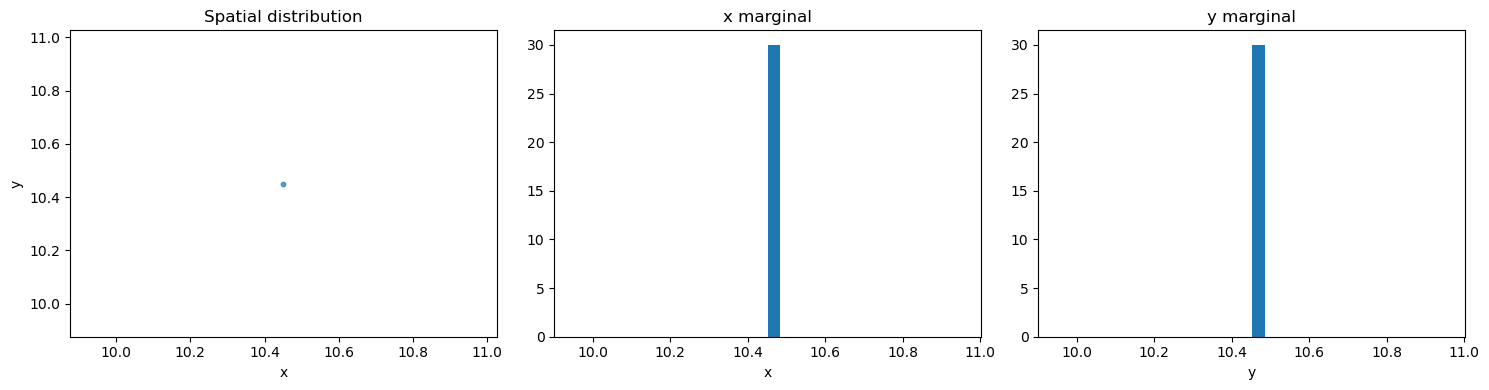

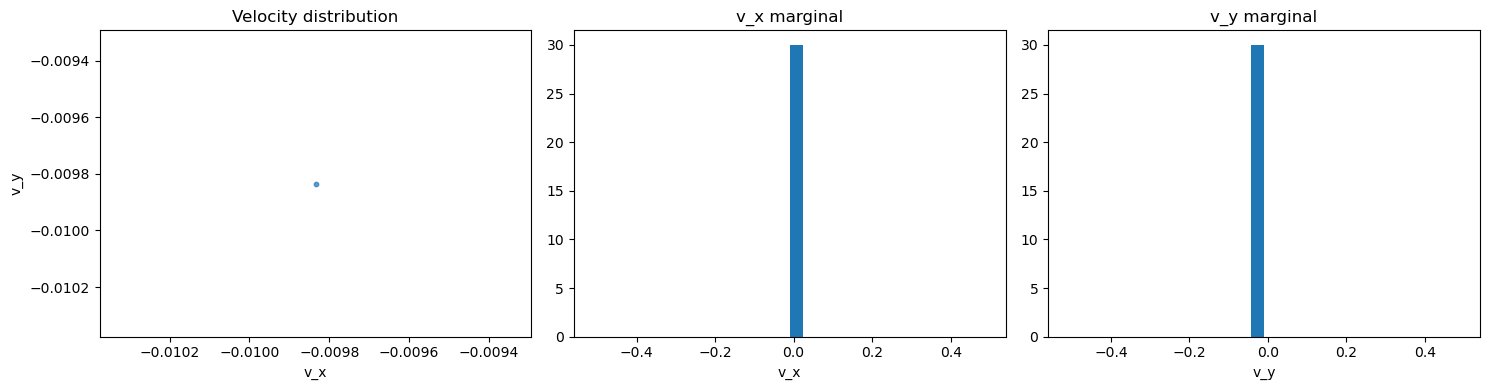

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# ----------------------------
# Load CSV
# ----------------------------
# change filename as needed
# find all Lorentz_Part_*.csv files in the current directory
# select the last one
file_match = glob.glob("Lorentz_Part_*.csv")
file_match.sort()
filename = file_match[-1]
print("Loading file: ", filename)
df = pd.read_csv(filename)

x  = df["X"].to_numpy()
y  = df["Y"].to_numpy()
vx = df["Field_2_0"].to_numpy()
vy = df["Field_2_1"].to_numpy()

# ----------------------------
# Spatial distribution
# ----------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(x, y, s=10, alpha=0.7)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("Spatial distribution")

axs[1].hist(x, bins=30, density=True)
axs[1].set_xlabel("x")
axs[1].set_title("x marginal")

axs[2].hist(y, bins=30, density=True)
axs[2].set_xlabel("y")
axs[2].set_title("y marginal")

plt.tight_layout()
plt.show()

# ----------------------------
# Velocity distribution
# ----------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(vx, vy, s=10, alpha=0.7)
axs[0].set_xlabel("v_x")
axs[0].set_ylabel("v_y")
axs[0].set_title("Velocity distribution")

axs[1].hist(vx, bins=30, density=True)
axs[1].set_xlabel("v_x")
# add ref: gaussian
axs[1].plot(np.linspace(min(vx), max(vx), 100), 
            np.exp(-np.linspace(min(vx), max(vx), 100)**2/2)/np.sqrt(2*np.pi), 
            color='red', label='Gaussian fit')
axs[1].set_title("v_x marginal")

axs[2].hist(vy, bins=30, density=True)
axs[2].set_xlabel("v_y")
# add ref: gaussian
axs[2].plot(np.linspace(min(vy), max(vy), 100), 
            np.exp(-np.linspace(min(vy), max(vy), 100)**2/2)/np.sqrt(2*np.pi), 
            color='red', label='Gaussian fit')
axs[2].set_title("v_y marginal")

plt.tight_layout()
plt.show()

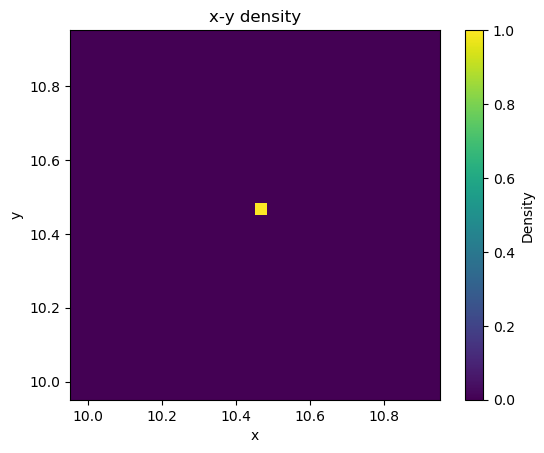

In [47]:
# plot x-y-density
H, xedges, yedges = np.histogram2d(x, y, bins=32)
X, Y = np.meshgrid(xedges, yedges)
plt.imshow(H.T, extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()], origin='lower', cmap='viridis')
plt.xlabel("x")
plt.ylabel("y")
plt.title("x-y density")
plt.colorbar(label='Density')
plt.show()

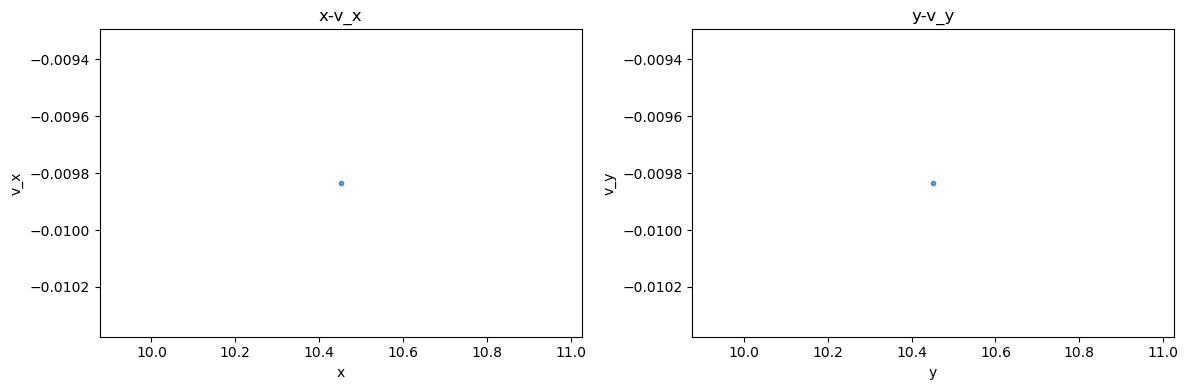

In [48]:
# plot x1-v1 and v1-v2
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(x, vx, s=10, alpha=0.7)
axs[0].set_xlabel("x")
axs[0].set_ylabel("v_x")
axs[0].set_title("x-v_x")
axs[1].scatter(y, vy, s=10, alpha=0.7)
axs[1].set_xlabel("y")
axs[1].set_ylabel("v_y")
axs[1].set_title("y-v_y")
plt.tight_layout()
plt.show() 

In [49]:
dt = 0.0025

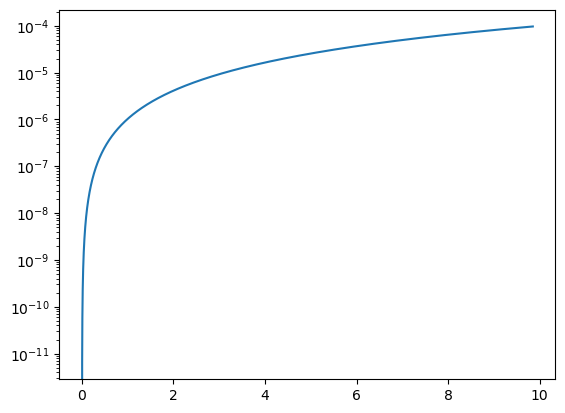

In [50]:
df = pd.read_csv("energy.csv", header=None)
plt.plot(np.linspace(0, len(df[0])*dt, len(df[0])), df[0])
# log scale
plt.yscale('log')

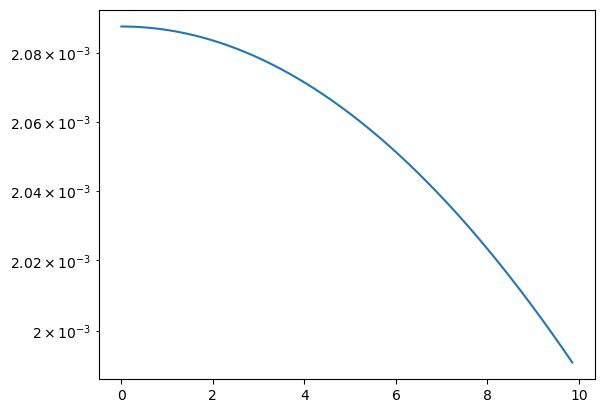

In [51]:
plt.plot(np.linspace(0, len(df[1])*dt, len(df[1])), df[1])
# log scale
plt.yscale('log')

Fitted line: y = -1.10e-06x + 1.00e+00


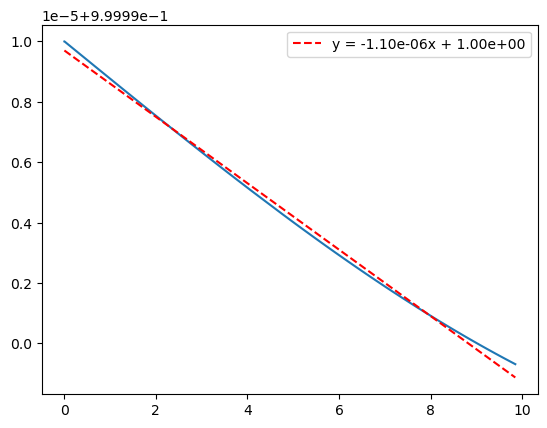

In [52]:
normalized = df[2] / df[2][0]
plt.plot(np.linspace(0, len(normalized)*dt, len(normalized)), normalized)
# fit the data with a line
z = np.polyfit(np.linspace(0, len(normalized)*dt, len(normalized)), normalized, 1)
p = np.poly1d(z)
print("Fitted line: y = {:.2e}x + {:.2e}".format(z[0], z[1]))
plt.plot(np.linspace(0, len(normalized)*dt, len(normalized)), p(np.linspace(0, len(normalized)*dt, len(normalized))), "r--", label="y = {:.2e}x + {:.2e}".format(z[0], z[1]))
plt.legend()
# log scale

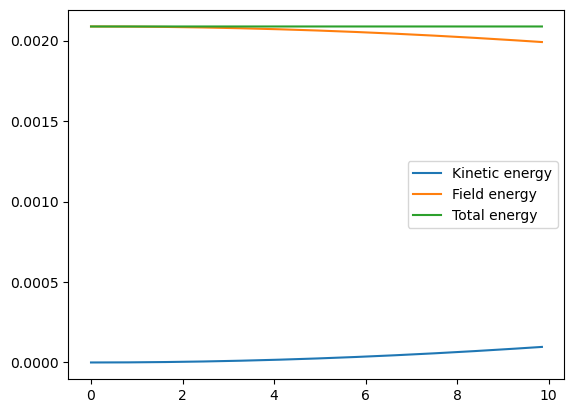

In [53]:
plt.plot(np.linspace(0, len(df[0])*dt, len(df[0])), df[0], label='Kinetic energy')
plt.plot(np.linspace(0, len(df[1])*dt, len(df[1])), df[1], label='Field energy')
plt.plot(np.linspace(0, len(df[2])*dt, len(df[2])), df[2], label='Total energy')
plt.legend()

np.float64(-1.0002155874829801)

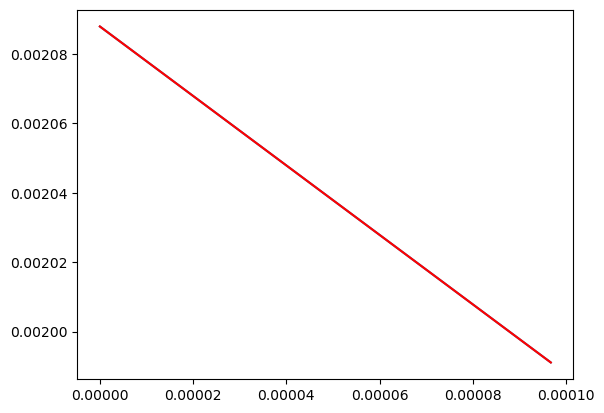

In [54]:
plt.plot(df[0], df[1])
# fit the slope
slope, intercept = np.polyfit(df[0], df[1], 1)
plt.plot(df[0], slope * df[0] + intercept, color='red')
slope

In [55]:
def compute_landau_normalized(n0, m, q, k, v_th=1.0):
    """
    Compute Landau damping in normalized units where ε₀ = 1.
    
    Parameters:
    -----------
    n0 : float
        Number density (normalized)
    m : float
        Particle mass (normalized)
    q : float
        Particle charge (normalized)
    k : float
        Wavenumber (normalized)
    v_th : float, optional
        Thermal velocity (default=1, from your N(0,1) initialization)
    
    Returns:
    --------
    dict with all computed parameters
    """
    # With ε₀ = 1, formulas simplify
    omega_p = np.sqrt(n0 * q**2 / m)  # Plasma frequency
    
    # λ_D = v_th / ω_p
    lambda_D = v_th / omega_p
    
    # Dimensionless parameter
    k_lambda_D = k * lambda_D
    
    # Real frequency (Bohm-Gross dispersion)
    omega_r = omega_p * np.sqrt(1.0 + 3.0 * k_lambda_D**2)
    
    # Damping rate - standard Landau formula
    # γ = -√(π/8) * ω_p / (kλ_D)^3 * exp(-1/(2(kλ_D)^2) - 3/2)
    exponent = -1.0 / (2.0 * k_lambda_D**2) - 1.5
    gamma = -np.sqrt(np.pi / 8.0) * omega_p / (k_lambda_D**3) * np.exp(exponent)
    
    # Alternative without -3/2 term (sometimes used)
    gamma_alt = -np.sqrt(np.pi / 8.0) * omega_p / (k_lambda_D**3) * \
                np.exp(-1.0 / (2.0 * k_lambda_D**2))
    
    # Results
    results = {
        'omega_p': omega_p,
        'omega_r': omega_r,
        'gamma': gamma,
        'gamma_alt': gamma_alt,
        'lambda_D': lambda_D,
        'k_lambda_D': k_lambda_D,
        'v_th': v_th,
        'period': 2.0 * np.pi / omega_r,
        'damping_time': 1.0 / abs(gamma) if gamma != 0 else np.inf,
        'oscillations_before_damping': omega_r / (2.0 * np.pi * abs(gamma)) if gamma != 0 else np.inf,
        'gamma_over_omega': gamma / omega_r
    }
    
    return results

n0 = len(x) / (x.max() - x.min()) / (y.max() - y.min())
k = 2.0 * np.pi / (x.max() - x.min())
compute_landau_normalized(n0=n0, m=1.0, q=0.1, k=k)

/var/folders/m2/43gtfgs566j0k_rrtmc1gps80000gn/T/ipykernel_63992/3428557128.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  n0 = len(x) / (x.max() - x.min()) / (y.max() - y.min())
/var/folders/m2/43gtfgs566j0k_rrtmc1gps80000gn/T/ipykernel_63992/3428557128.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  k = 2.0 * np.pi / (x.max() - x.min())
/var/folders/m2/43gtfgs566j0k_rrtmc1gps80000gn/T/ipykernel_63992/3428557128.py:29: RuntimeWarning: invalid value encountered in scalar multiply
  k_lambda_D = k * lambda_D


{'omega_p': np.float64(inf),
 'omega_r': np.float64(nan),
 'gamma': np.float64(nan),
 'gamma_alt': np.float64(nan),
 'lambda_D': np.float64(0.0),
 'k_lambda_D': np.float64(nan),
 'v_th': 1.0,
 'period': np.float64(nan),
 'damping_time': np.float64(nan),
 'oscillations_before_damping': np.float64(nan),
 'gamma_over_omega': np.float64(nan)}